In [1]:
#vaccinations by date for countries
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [2]:
#reads the api for confirmed
cases="https://covid-api.mmediagroup.fr/v1/history?country=all&status=confirmed"
response=requests.get(cases)
temp=response.json()

#reads the api for deaths
deaths="https://covid-api.mmediagroup.fr/v1/history?country=all&status=deaths"
response2=requests.get(deaths)
temp2=response2.json()

In [3]:
the_confirmed_dates=[]
the_confirmed=[]
the_country=[]

#finds the dates and confirmed cases for all the countries
for i in temp:
    the_confirmed_temp=temp[i]['All']['dates']
    for d in the_confirmed_temp:
        the_country.append(i)
        the_confirmed_dates.append(d)
        the_confirmed.append(the_confirmed_temp[d])


In [4]:
the_death_dates=[]
the_death=[]
the_country=[]

for i in temp2:
    the_death_temp=temp2[i]['All']['dates']
    for d in the_death_temp:
        the_country.append(i)
        the_death_dates.append(d)
        the_death.append(the_death_temp[d])

#the total deaths and total confirmed are updated daily but at slightly different times
#if one of the print out below has less rows, that is because it hasn't been updated yet that day
#which will give an error. It should update soon though
print (len(the_country))
print (len(the_confirmed_dates))
print (len(the_confirmed))
print (len(the_death))


89745
89745
89745
89745


In [5]:
confirmed_dict={'Location': the_country,'Date':the_confirmed_dates,"Total_Confirmed":the_confirmed,"Total_Deaths":the_death}   
confirmed_df=pd.DataFrame(confirmed_dict)

the_list=[confirmed_df['Location'],confirmed_df['Date'],confirmed_df['Total_Confirmed'],confirmed_df['Total_Deaths']]

daily_confirmed=[]
daily_deaths=[]

for row in range(0,len(the_list[0]),1):
    if row != len(the_list[0])-1:
        if the_list[0][row]==the_list[0][row+1]: #same country
            daily_confirmed.append(the_list[2][row] - the_list[2][row+1])
            daily_deaths.append(the_list[3][row] - the_list[3][row+1])
        else: #at a new country
            daily_confirmed.append(the_list[2][row])
            daily_deaths.append(the_list[3][row])
    else:
        daily_confirmed.append(the_list[2][row])
        daily_deaths.append(the_list[3][row])

        
                

In [6]:
#outputs all the dates for all the countries
print()
print()
print("         Covid Cases All Countries: 01/22/2020 to 04/30/2021")
print("---------------------------------------------------------------------")
confirmed_df["Daily_Confirmed"]=daily_confirmed
confirmed_df["Daily_Deaths"]=daily_deaths
confirmed_df



         Covid Cases All Countries: 01/22/2020 to 04/30/2021
---------------------------------------------------------------------


,Location,Date,Total_Confirmed,Total_Deaths,Daily_Confirmed,Daily_Deaths
0,Afghanistan,2021-04-30,59745,2625,169,7
1,Afghanistan,2021-04-29,59576,2618,206,7
2,Afghanistan,2021-04-28,59370,2611,145,13
3,Afghanistan,2021-04-27,59225,2598,210,6
4,Afghanistan,2021-04-26,59015,2592,172,10
...,...,...,...,...,...,...
89740,Global,2020-01-26,2118,56,685,14
89741,Global,2020-01-25,1433,42,492,16
89742,Global,2020-01-24,941,26,286,8
89743,Global,2020-01-23,655,18,98,1


In [17]:
#outputs just april of 2021
print()
print()
print("         Covid Cases All Countries: April 2021)")
print("---------------------------------------------------------------------")
      
april_df=confirmed_df.loc[((confirmed_df['Date'].str.contains("2021-04")) | (confirmed_df['Date'].str.contains("2021-03")) | (confirmed_df['Date'].str.contains("2021-02")))]
april_df.to_csv("output/april_covid_rates.csv", index=False)
april_df



         Covid Cases All Countries: April 2021)
---------------------------------------------------------------------


,Location,Date,Total_Confirmed,Total_Deaths,Daily_Confirmed,Daily_Deaths
0,Afghanistan,2021-04-30,59745,2625,169,7
1,Afghanistan,2021-04-29,59576,2618,206,7
2,Afghanistan,2021-04-28,59370,2611,145,13
3,Afghanistan,2021-04-27,59225,2598,210,6
4,Afghanistan,2021-04-26,59015,2592,172,10
...,...,...,...,...,...,...
89364,Global,2021-02-05,105358906,2304982,534971,16567
89365,Global,2021-02-04,104823935,2288415,466263,12529
89366,Global,2021-02-03,104357672,2275886,521385,15724
89367,Global,2021-02-02,103836287,2260162,457150,14831


In [24]:
p=april_df.loc[april_df['Location']=="US"]
p

,Location,Date,Total_Confirmed,Total_Deaths,Daily_Confirmed,Daily_Deaths
82770,US,2021-04-30,32346971,576232,57922,1038
82771,US,2021-04-29,32289049,575194,58199,854
82772,US,2021-04-28,32230850,574340,55125,959
82773,US,2021-04-27,32175725,573381,50856,641
82774,US,2021-04-26,32124869,572740,47691,474
...,...,...,...,...,...,...
82854,US,2021-02-05,26877601,466167,134397,3688
82855,US,2021-02-04,26743204,462479,123975,3736
82856,US,2021-02-03,26619229,458743,121641,3906
82857,US,2021-02-02,26497588,454837,115333,3429


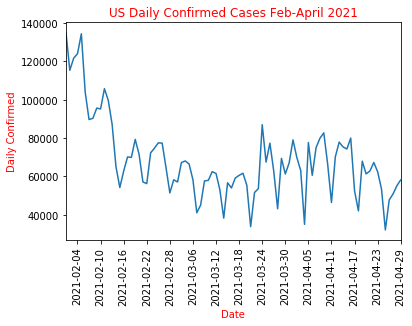

In [25]:
#tic_locations = range(0,15,1)
plt.title("US Daily Confirmed Cases Feb-April 2021", color='red')
plt.xlabel('Date',color='red')
plt.ylabel('Daily Confirmed',color='red')
tic_locations=range(1,len(p['Date']),1)
plt.plot(p['Date'],p['Daily_Confirmed'])
plt.xticks(tic_locations,rotation=90)
plt.locator_params(axis="x", nbins=15)
plt.xlim(max(tic_locations), min(tic_locations))
plt.show() 